In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

np.set_printoptions(suppress=True, precision=3)

import seaborn as sns

In [2]:
%reload_ext autoreload
%autoreload 2

# Анализ датасетов и визуализация

## Wine Clustering

In [3]:
data = pd.read_csv("wine-clustering.csv")
data.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data_emb_tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=10).fit_transform(X=data)
data_emb_pca = PCA(n_components=2).fit_transform(data)

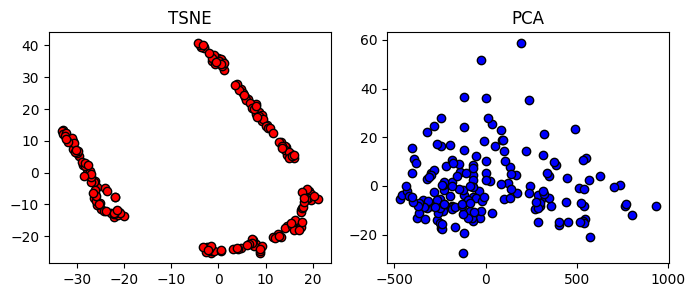

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].scatter(data_emb_tsne[:, 0], data_emb_tsne[:, 1], c='red', edgecolors='k')
axes[0].set_title("TSNE")

axes[1].scatter(data_emb_pca[:, 0], data_emb_pca[:, 1], c='blue', edgecolors='k')
axes[1].set_title("PCA")

plt.show()

Предположение: алгоритмы должны выделить 3 кластера. PCA не справился с визуализацией, так как данные могут быть разделимы нелинейно.

## Mall Customers

In [478]:
data = pd.read_csv("mall-customers.csv")
data["Gender"] = data["Gender"].replace(['Male', 'Female'], [0, 1])

data.head(5)

C:\Users\Anastasia\AppData\Local\Temp\ipykernel_3172\4115090244.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Gender"] = data["Gender"].replace(['Male', 'Female'], [0, 1])


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [66]:
data_emb_tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=15).fit_transform(X=data)
data_emb_pca = PCA(n_components=2).fit_transform(data)

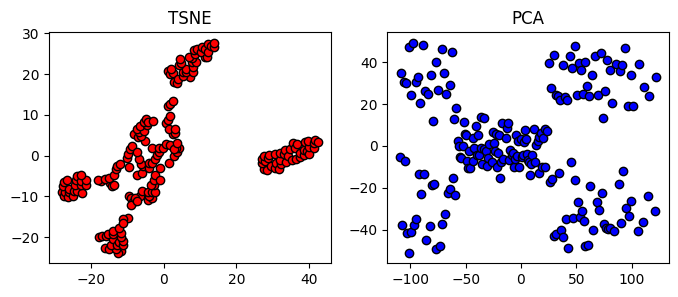

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].scatter(data_emb_tsne[:, 0], data_emb_tsne[:, 1], c='red', edgecolors='k')
axes[0].set_title("TSNE")

axes[1].scatter(data_emb_pca[:, 0], data_emb_pca[:, 1], c='blue', edgecolors='k')
axes[1].set_title("PCA")

plt.show()

Предположительно, алгоритмы должны выделить 5 кластеров.

# Дендрограмма и иерархический алгоритм

In [6]:
from scipy.spatial.distance import cdist # cdist принимает размерности (N_samples, N_features)
from hierarchical_algorithm import hierarchical_algorithm

from scipy.cluster import hierarchy

(178, 178)


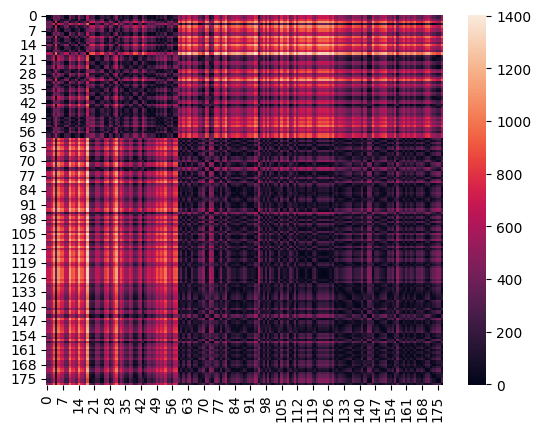

In [31]:
distances2plot = cdist(data.to_numpy(), data.to_numpy())
np.fill_diagonal(distances2plot, -1)
sns.heatmap(distances2plot)
print(distances2plot.shape)

In [32]:
distances = cdist(data.to_numpy(), data.to_numpy())
np.fill_diagonal(distances, np.inf)
distances.shape

(178, 178)

In [33]:
%%time
pairwise_distances, all_clusters_power = hierarchical_algorithm(distances)

CPU times: total: 46.9 ms
Wall time: 59 ms


In [23]:
linkage_matrix = np.array([]).reshape((0, 4))
for k, v in pairwise_distances.items():
    row = np.array([k[0], k[1], v, all_clusters_power[k[0]] + all_clusters_power[k[1]]])
    linkage_matrix = np.vstack([linkage_matrix, row])

linkage_matrix.shape

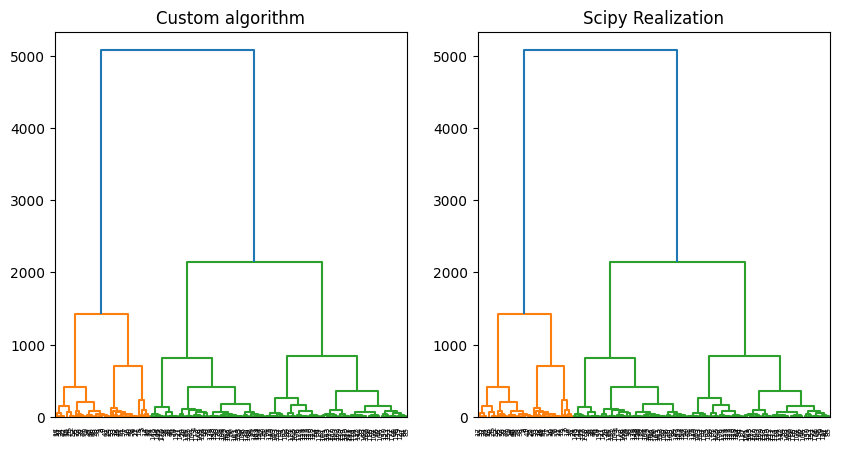

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

dm0 = hierarchy.dendrogram(linkage_matrix, ax=axes[0])
axes[0].set_title("Custom algorithm")

Z = hierarchy.linkage(data, 'ward')
dm1 = hierarchy.dendrogram(Z, ax=axes[1])
axes[1].set_title("Scipy Realization")

plt.show()

# EM-алгоритм